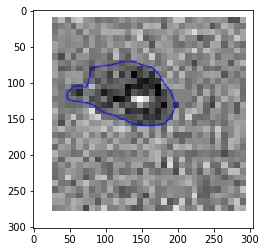

In [23]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

filename = 'segmented_particle/21_seg.jpg'

image = cv2.imread(filename)
plt.imshow(image)
plt.show()

In [10]:
boundaries = [
	([17, 15, 100], [50, 56, 200]),
	([86, 31, 4], [220, 88, 50]),
	([25, 146, 190], [62, 174, 250]),
	([103, 86, 65], [145, 133, 128])
]
lower = np.array([17, 15, 100])#np.array(boundaries[0][0])
upper = np.array([50, 56, 200])#np.array(boundaries[0][1])

mask = cv2.inRange(image, lower, upper)
output = cv2.bitwise_and(image, image, mask=mask)
width, height = output.shape[:2]
#output = cv2.resize(output,(32,32), interpolation = cv2.INTER_LINEAR)

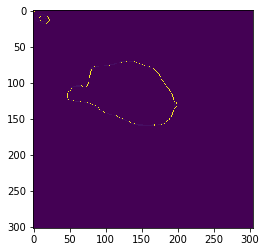

4.0


In [26]:
img = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
i = cv2.polylines(img, hull, True, (255,255,255), 2)
#img = cv2.resize(img, (32,32), interpolation=cv2.INTER_LINEAR)
contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
hull = np.array([cv2.convexHull(cnt) for cnt in contours])
plt.imshow(img)
plt.show()
print cv2.contourArea(contours[0])